<a href="https://colab.research.google.com/github/Octaxx/DLI/blob/main/Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


url = "https://raw.githubusercontent.com/Octaxx/DLI/main/CEAS_08.csv"
df = pd.read_csv(url)

In [4]:
df['text'] = df['subject'].fillna('') + ' ' + df['body'].fillna('')

X = df['text']
y = df['label']

In [5]:
# Sets how many times to train & test the model
num_runs = 10
total_accuracy = 0

for run in range(num_runs):
    print(f"\n=== Run {run + 1}/{num_runs} ===")

    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1, 2), min_df=2)
    X_tfidf = vectorizer.fit_transform(X)

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=run, stratify=y)

    # Naive Bayes Model
    model = MultinomialNB(alpha=1.0)
    model.fit(X_train, y_train)

    # Predictions & Evaluation
    y_pred = model.predict(X_test)

    # Accuracy for this run
    accuracy = accuracy_score(y_test, y_pred)
    total_accuracy += accuracy

    print("Accuracy:", accuracy)

avg_accuracy = total_accuracy / num_runs
print(f"\n✅ Average Accuracy over {num_runs} runs: {avg_accuracy:.4f}")


=== Run 1/10 ===
Accuracy: 0.9730558038564678

=== Run 2/10 ===
Accuracy: 0.9701187587792108

=== Run 3/10 ===
Accuracy: 0.9736942919167412

=== Run 4/10 ===
Accuracy: 0.9699910611671562

=== Run 5/10 ===
Accuracy: 0.9731835014685225

=== Run 6/10 ===
Accuracy: 0.9725450134082493

=== Run 7/10 ===
Accuracy: 0.9697356659430468

=== Run 8/10 ===
Accuracy: 0.9724173157961946

=== Run 9/10 ===
Accuracy: 0.9772698250542715

=== Run 10/10 ===
Accuracy: 0.9713957348997574

✅ Average Accuracy over 10 runs: 0.9723


In [6]:
# Save the model
import pickle
with open('/content/drive/My Drive/Colab Notebooks/model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('/content/drive/My Drive/Colab Notebooks/vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

In [7]:
print("\n======== Email Spam Detection ========")

# Take user input
user_input = input("Enter your email text: ")

user_input_tfidf = vectorizer.transform([user_input])
prediction = model.predict(user_input_tfidf)

# Show result
if prediction[0] == 1:
    print("🔴 This email is classified as: Phishing / Spam")
else:
    print("🟢 This email is classified as: Safe / Not Phishing")


======== Email Spam Detection ========
Enter your email text: big
🔴 This email is classified as: Phishing / Spam


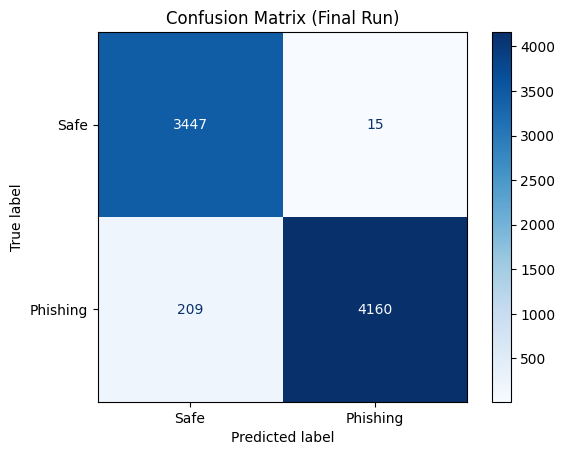

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion matrix from the last run
cm = confusion_matrix(y_test, y_pred)

# Display it as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Safe', 'Phishing'])
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix (Final Run)")
plt.show()



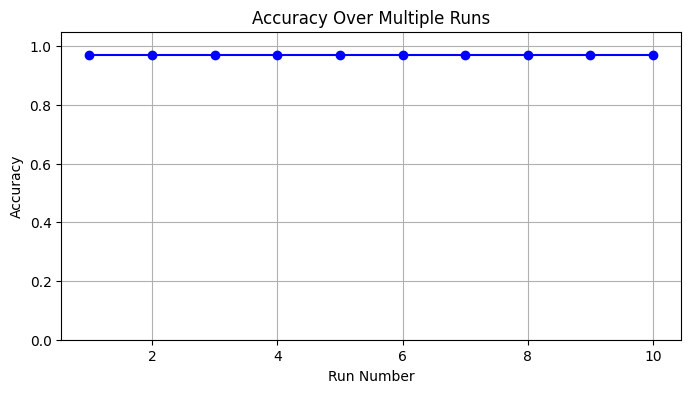

In [13]:
accuracies = []

for run in range(num_runs):
    ...
    accuracy = accuracy_score(y_test, y_pred)

    accuracies.append(accuracy)   # <-- Put this inside your run loop

plt.figure(figsize=(8, 4))
plt.plot(range(1, num_runs + 1), accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy Over Multiple Runs')
plt.xlabel('Run Number')
plt.ylabel('Accuracy')
plt.ylim(0, 1.05)
plt.grid(True)
plt.show()


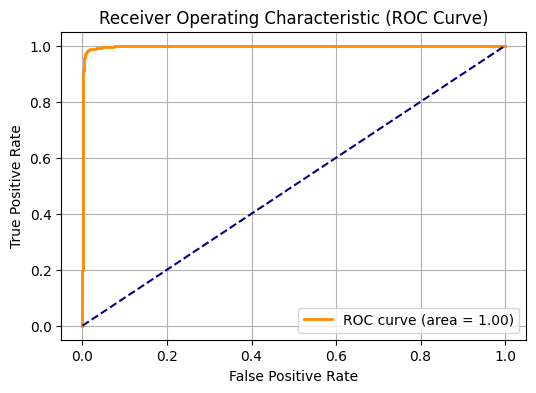

In [11]:
from sklearn.metrics import roc_curve, auc

# Get the probabilities of spam (class 1)
y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC Curve)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


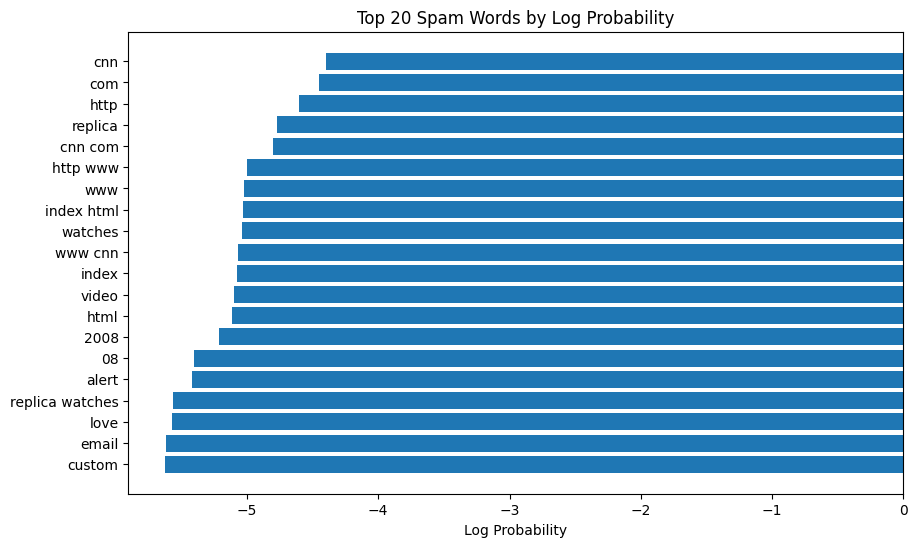

In [12]:
# Get feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get spam log probabilities
spam_word_probs = model.feature_log_prob_[1]  # class 1 is spam

# Get top 20 words
top_indices = spam_word_probs.argsort()[-20:]
top_words = feature_names[top_indices]
top_probs = spam_word_probs[top_indices]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_words, top_probs)
plt.xlabel('Log Probability')
plt.title('Top 20 Spam Words by Log Probability')
plt.show()
